In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
# Initial weights
W  = np.random.uniform( -.1, .1, size=(3,3) )

# input the dataset
TRAIN_X1 = [ 4, 4, 5, 5, 7,      1,  2,  3,  6,  3,  6,  4,  7 ]
TRAIN_X2 = [ 2, 4, 3, 1, 2,      2,  1,  1,  5,  6,  7,  6,  6 ]
TRAIN_Z  = [ 1, 1, 1, 1, 1,     -1, -1, -1, -1, -1, -1, -1, -1 ]
TRAIN_N  = len(TRAIN_X1)
TRAIN_X0 = np.ones(TRAIN_N)

TEST_X1 = [ 4, 5, 3, 5, 6, 7,    3,  8,  4,  7,  2,  2 ]
TEST_X2 = [ 1, 2, 4, 4, 1, 1,    2,  7,  7,  5,  3,  5 ]
TEST_Z  = [ 1, 1, 1, 1, 1, 1,   -1, -1, -1, -1, -1, -1 ]
TEST_N  = len(TEST_X1)
TEST_X0 = np.ones(TEST_N)

TRAIN_X  = np.array( [TRAIN_X0, TRAIN_X1, TRAIN_X2] ).T

In [28]:
i = 0
j = 0
W[i,:]

array([ 0.05132926,  0.06613931,  0.0537399 ])

In [17]:
def plot_sep_line(w, n):
    
    domain = np.linspace(0,n)
    image  = list( map( lambda x : -(w[1]*x + w[0])/w[2] , domain ) )
    plt.plot(domain, image, color='purple')
    
def plot_result(w,h,n,X1,X2,line=False):
    if line: plot_sep_line(w, n)
    _ = plt.scatter(x=X1[:h], y=X2[:h], color='b')
    _ = plt.scatter(x=X1[h:], y=X2[h:], color='r')

## a)

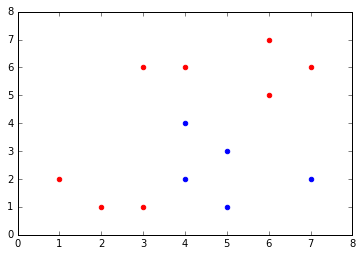

In [23]:
plot_result(W[0],5, TRAIN_N, TRAIN_X1, TRAIN_X2)

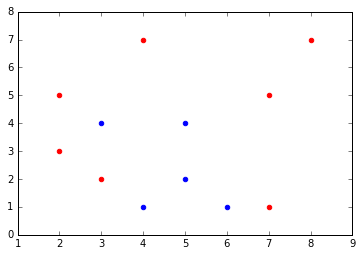

In [24]:
plot_result(W[0],5, TEST_N, TEST_X1, TEST_X2)

In [16]:
def sigmoid(x):
    return 2*1/(1+np.exp(-x)) - 1

def step(x):
    return np.where( x > 0, 1, -1 )

def linear (x):
    return x

# Pass the activation Function
# Options: linear, step, sigmoid
activate = linear

def err(w, x, z):
    net = activate( np.dot(x,w) )
    return z - net

def plot_errors(errors):
    plt.plot(range(0,len(errors)), errors, label='Error' )   
    plt.legend()

New weights after 1 iteration:
 W0 = 1.9522
 W1 = 0.4396
 W2 = -0.7511


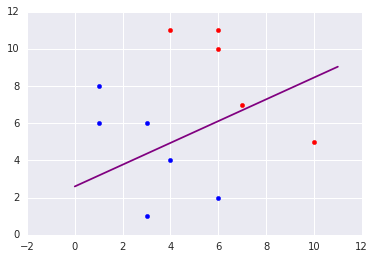

In [24]:
ETA = 1/50
W2  = W
M   = 1

for i in range(0,M):
    update_avg  = 0
    
    for x,z in zip(X,Z):
        e = err(W2,x,z)
        update_avg  += ETA * e * x / N
        
    W2 += update_avg      # Update the weights

print('New weights after 1 iteration:\n W0 = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W2 ) )
plot_result(W2)

New weights:
 W0 = 2.5327
 W1 = -0.2583
 W2 = -0.1938


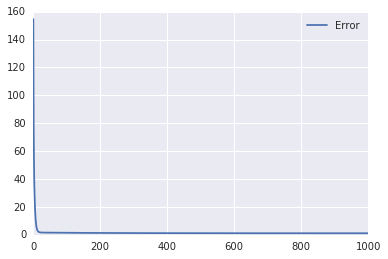

In [25]:
ETA = 1/50
W2  = W
M   = 1000

errors = []

for i in range(0,M):
    total_error = 0
    update_avg  = 0
    
    for x,z in zip(X,Z):
        e = err(W2,x,z)
        total_error += e ** 2
        update_avg  += ETA * e * x / N
        
    W2 += update_avg      # Update the weights
    errors.append(total_error)
    if total_error == 0 : break

print('New weights:\n W0 = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W2 ) )
plot_errors(errors)

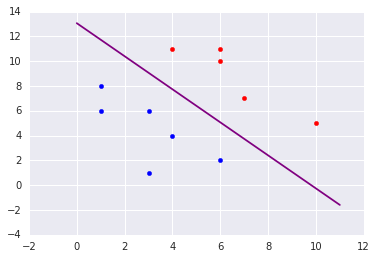

In [26]:
plot_result(W2)

<br/><br/><br/><br/>

$$ E = ... $$
$$ \frac{ \partial E } { \partial w_1 } $$